## Situação problema

Como você explicaria o comportamento dos <b>Depósitos Totais (Depósito à Vista, Depósito a Prazo e Poupança)</b> do Brasil nos últimos 5 anos utilizando o <b>PIB, Selic, Inflação e Desemprego</b>?

### Obtenção dos dados
Primeiramente foi criada uma função para importar os dados. Os dados utilizados foram retirados do Sistema de Gerenciamento de Séries Temporais do <br>Banco Central</br> (https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries). Cada dado contém um código que permite importá-lo no formato JSON por meio de api. Os dados têm data inicial de 01/01/2017 a 01/01/2022, totalizando 5 anos.

In [1]:
# Função para Obter base de dados
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def obter_dado(codigo):

    dataInicial = "01/01/2017"
    dataFinal = "01/01/2022"

    url = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}"

    Tabela = pd.read_json(url)
    #Tabela.set_index('data', inplace = True)
    #display(Tabela)
    return Tabela

Em seguida, para entender cada um dos dados, foi feita uma seção que possibilita a visualização inicial, bem como uma consulta posterior durante a elaboração do código. 

In [2]:
#CONSULTA AOS DADOS

#POUPANCA Saldo/Captação líquida diária - 23/24  fonte: Sisbacen PESP300
#POUPANÇA rendimento mensal - 196 BCB-Demab
#DEPOSITOS PRAZO DIARIO - 15 E 19 fonte:Sisbacen PESP300
#DEPOSITOS A VISTA - 27784 fonte:BCB

#PIB TRIMESTRAL OU ANUAL - 22099/7326 fonte:IBGE
#INFLAÇÃO VARIAÇÃO MENSAL - 433 fonte:IBGE
#DESEMPREGO PNADC MENSAL - 24369 fonte:IBGE
#TAXA SELIC anual/diaria - 432/11 fonte:BCB

Dados = obter_dado(23)

#display(Dados) 
#Dados.info()

#fig = px.line(Dados, x="data", y="valor")
#fig.show()

Dessa forma, foram selecionados os dados dos depósitos totais (Saldo da poupança, saldo do depósito a prazo e saldo do depósito à vista) e dos indicadores - IPCA (inflação), Taxa Selic, Taxa de semprego (PNAD) e PIB. Importante salientar que os dados têm periodicidade diferentes, sendo diário, mensal, trimestral ou anual. Há alguns dados que foram acrescentados para tornar a análise mais interessante.

In [2]:
#Importando os dados

#Depósitos Totais

#Dados_poupanca = obter_dado(23)  #saldo da poupança diário
#Dados_rend_poupanca = obter_dado(196) #rentabilidade da poupança
#Dados_dep_prazo_pre = obter_dado(15) #saldo dos depósitos a prazo pré-fixados
#Dados_dep_prazo_pos = obter_dado(19) #saldo dos depósitos a prazo pós-fixados
#Dados_dep_vista = obter_dado(27784) #saldo dos depósitos à vista


#Indicadores

Dados_ipca_anual = pd.DataFrame({'data':['01/01/2018', '01/01/2019', '01/01/2020', '01/01/2021', '01/01/2022'],
                                 'valor':[2.95, 3.75, 4.31, 4.52, 10.06]}) #Dados da inflação acumulada no ano Fonte: IBGE
Dados_ipca = obter_dado(433)  #dados da inflação mensal
Dados_selic = obter_dado(432)  #dados da taxa selic anual
Dados_selic_dia = obter_dado(11)  #dados da taxa selic diária
Dados_desemprego = obter_dado(24369)  #Taxa desemprego trimestral
Dados_pib_trim = obter_dado(22099)  #dados do PIB trimestral
Dados_pib = pd.DataFrame({'data':['01/01/2018', '01/01/2019', '01/01/2020', '01/01/2021', '01/01/2022'],
                                 'valor':[1.32, 1.78, 1.22, -3.88, 4.62]}) #Dados do PIB acumulado no ano Fonte: IBGE

#Dados_pib1 = obter_dado(7326)  #dados do PIB anual


Em seguida, foi criada uma função para colocar o primeiro dia de todos os meses em alguns dados, tendo em vista que, em alguns, as coletas ocorrem somente nos dias úteis, o que faz com que não haja o dia 1 do mês quando cai em fim de semana ou feriado.

In [4]:
#Função para acrescentar o primeiro dia do mês

def primeiro_dia(Dados_data):
    Dados_data.loc[0,'data'] = "01/01/2017"
    Dados_data.loc[63,'data'] = "01/04/2017"
    Dados_data.loc[81,'data'] = "01/05/2017"
    Dados_data.loc[124,'data'] = "01/07/2017"
    Dados_data.loc[188,'data'] = "01/10/2017"
    Dados_data.loc[249,'data'] = "01/01/2018"
    Dados_data.loc[310,'data'] = "01/04/2018"
    Dados_data.loc[331,'data'] = "01/05/2018"
    Dados_data.loc[373,'data'] = "01/07/2018"
    Dados_data.loc[418,'data'] = "01/09/2018"
    Dados_data.loc[479,'data'] = "01/12/2018"
    Dados_data.loc[499,'data'] = "01/01/2019"
    Dados_data.loc[581,'data'] = "01/05/2019"
    Dados_data.loc[603,'data'] = "01/06/2019"
    Dados_data.loc[667,'data'] = "01/09/2019"
    Dados_data.loc[731,'data'] = "01/12/2019"
    Dados_data.loc[752,'data'] = "01/01/2020"
    Dados_data.loc[774,'data'] = "01/02/2020"
    Dados_data.loc[792,'data'] = "01/03/2020"
    Dados_data.loc[834,'data'] = "01/05/2020"
    Dados_data.loc[898,'data'] = "01/08/2020"
    Dados_data.loc[961,'data'] = "01/11/2020"
    Dados_data.loc[1003,'data'] = "01/01/2021"
    Dados_data.loc[1084,'data'] = "01/05/2021"
    Dados_data.loc[1148,'data'] = "01/08/2021"
    Dados_data.loc[1254,'data'] = "01/01/2022"
    
    return Dados_data



### Panorama geral dos dados
Antes de fazer comparações com os dados de depósito, foi feito um Panorama geral dos índices IPCA, Selic, desemprego e PIB. 

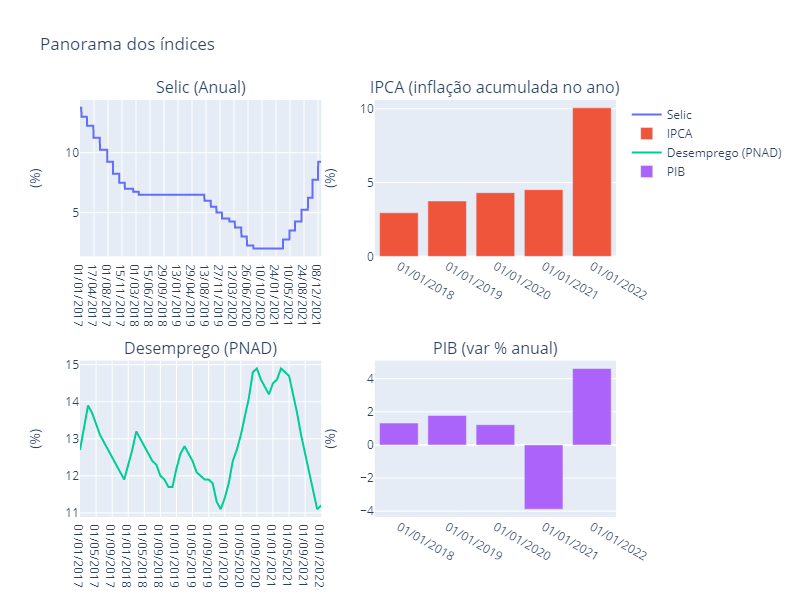

In [3]:
#plot dos gráficos dos índices

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2,subplot_titles=("Selic (Anual)","IPCA (inflação acumulada no ano)", "Desemprego (PNAD)", "PIB (var % anual)"))


# Gráfico Selic
fig.add_trace(
    go.Scatter(x= Dados_selic['data'], y=Dados_selic['valor'], name="Selic"),
    row=1, col=1
)

# Gráfico IPCA
fig.add_trace(
    go.Bar(x= Dados_ipca_anual['data'], y=Dados_ipca_anual['valor'], name="IPCA"),
    row=1, col=2
)

#Gráfico Desemprego
fig.add_trace(
    go.Scatter(x= Dados_desemprego['data'], y=Dados_desemprego['valor'], name="Desemprego (PNAD)"),
    row=2, col=1
)

#Gráfico PIB
fig.add_trace(
    go.Bar(x= Dados_pib['data'], y=Dados_pib['valor'], name="PIB"),
    row=2, col=2
)

#legendas

fig.update_yaxes(title_text="(%)", row=1, col=1)
fig.update_yaxes(title_text="(%)", row=1, col=2)
fig.update_yaxes(title_text="(%)", row=2, col=1)
fig.update_yaxes(title_text="(%)", row=2, col=2)
fig.update_layout(height=600, width=800, title_text="Panorama dos índices")

fig.show(renderer = "png")

Analisando os gráficos é possível perceber que no ano de 2020 houve uma variação considerável nos índices, exceto na inflação, que obteve sua mudança abrupta no ano de 2021. Essas mudanças mais consideráveis ocorrem principalmente devido ao advento da pandemia de Covid. <br>
Com o panorama dos índices, foram analisadas a relação deles com os dados de depósito. Para uma visualização mais detalhada, cada um dos tipos de depósito foi analisado separadamente.

### Seção poupança
Primeiramente, foi feita a comparação com os dados da poupança. A seguir tem-se o gráfico do saldo diário da poupança nestes cinco anos e o seu rendimento.

In [6]:
#plot dos gráficos de poupança

fig = make_subplots(rows=2, cols=1,subplot_titles=("Saldo diário da poupança","Rentabilidade da poupança"))

#Saldo
fig.add_trace(
    go.Scatter(x= Dados_poupanca['data'], y=Dados_poupanca['valor'], name="Saldo"),
    row=1, col=1
)

#Rentabilidade
fig.add_trace(
    go.Bar(x= Dados_rend_poupanca['data'], y=Dados_rend_poupanca['valor'], name="Rentabilidade da Poupança"),
    row=2, col=1
)

#Legendas
fig.update_yaxes(title_text="R$", row=1, col=1)
fig.update_yaxes(title_text="(%)", row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Dados da Poupança")
fig.show()

In [7]:
# Gráfico mesclando os dois dados

poup = primeiro_dia(Dados_poupanca) #Função para colocar o primeiro dia

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Saldo
fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Saldo"),
    secondary_y=False,
)

#Rentabilidade
fig.add_trace(
    go.Scatter(x= Dados_rend_poupanca['data'], y=Dados_rend_poupanca['valor'], name="Redimento"),
    secondary_y=True,
)

 #Titulo
fig.update_layout(
    title_text="Saldo (R$) e Rendimento da Poupança (%) entre 01/2017 - 01/2022"
)

 #Set x-axis title
fig.update_xaxes(title_text="Data")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Saldo</b> (R$)", secondary_y=False)
fig.update_yaxes(title_text="<b>Rendimento</b> (%)", secondary_y=True)

fig.show()

Analisando o gráfico, percebe-se que houve um crescimento mais acentuado no saldo entre os meses 3 e 12 de 2020. Por outro lado houve, no mesmo período, um decréscimo considerável da rentabilidade, o que causa estranheza, pois aparentemente não impactou a decisão de optar guardar o dinheiro na poupança. Uma possível explicação para o saldo da poupança aumentar mesmo com a rentabilidade diminuindo é a confiança que os clientes têm nesse tipo de depósito.Dessa forma, para investigar melhor, faz-se a comparação com os demais dados.

In [8]:
#plot dos gráficos

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2,subplot_titles=("Selic (Anual)","IPCA (inflação acumulada no ano)", "Desemprego (PNAD)", "PIB (var % anual)"),
                                       specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]])
                   
#Grafico 1 - Selic x Poupança
fig.add_trace(
    go.Scatter(x= Dados_selic['data'], y=Dados_selic['valor'], name="Selic"),row=1, col=1,
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Poupança"),row=1, col=1,
    secondary_y=False,
)


#Gráfico 2 - Inflação x Poupança
fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Poupança"),row=1, col=2,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_ipca_anual['data'], y=Dados_ipca_anual['valor'], name="IPCA"),row=1, col=2,
    secondary_y=True,
)

#Gráfico 3 - Desemprego x Poupança

fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Poupança"),row=2, col=1,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_desemprego['data'], y=Dados_desemprego['valor'], name="Redimento"),row=2, col=1,
    secondary_y=True,
)
#Gráfico 4 - PIB X Poupança

fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Poupança"),row=2, col=2,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_pib['data'], y=Dados_pib['valor'], name="PIB"),row=2, col=2,
    secondary_y=True,
)


#Legenda dos eixos y

fig.update_yaxes(title_text="<b>Saldo</b> (R$)", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=1, col=1)

fig.update_yaxes(title_text="<b>Saldo</b> (R$)", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=1, col=2)

fig.update_yaxes(title_text="<b>Saldo</b> (R$)", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=2, col=1)

fig.update_yaxes(title_text="<b>Saldo</b> (R$)", secondary_y=False, row=2, col=2)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Saldo da poupança x índices")
fig.show()

A partir dos gráficos, nota-se que:
- A taxa Selic estava em queda enquanto o saldo da poupança aumentava
- A inflação cresceu consideravelmente quando a poupança já tinha crescido e estava estável
- O desemprego cresceu enquanto o saldo da poupança aumentou
- O PIB voltou a crescer no último ano, quando a poupança já estava estabilizada


Esses fatores podem não estar necessariamente relacionados, mas fazem parte de um contexto macro. Os motivos de queda e subida podem ter muitas explicações, no entanto a mudança notória dos indicadores em 2020 tem a pandemia como fator fundamental na composição.

Analisando os gráficos, causa estranheza a poupança ter aumentado ao mesmo tempo que a taxa de desemprego cresceu. Isso pode ter ocorrido devido a recolhimento do FGTS por parte de quem ficou desempregado. Outro fator a ser considerado é o fato de a Pandemia ter causado uma redução dos gastos com viagens, festas, idas a bares e restaurantes que pode ter favorecido a formação de uma poupança involuntária por parte da população, de acordo com a Ambima. (https://www.anbima.com.br/pt_br/noticias/pandemia-muda-habitos-de-poupanca-do-brasileiro-e-estimula-investimento-em-produtos-financeiros.htm)



In [9]:
# gráfico Rendimento da poupança x Taxa Selic

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Selic
fig.add_trace(
    go.Scatter(x= Dados_selic['data'], y=Dados_selic['valor'], name="Selic"), secondary_y=False
)

# Rentabilidade
fig.add_trace(
    go.Scatter(x= Dados_rend_poupanca['data'], y=Dados_rend_poupanca['valor'], name="Rentabilidade"), secondary_y=True
)


 #Título
fig.update_layout(
    title_text="Taxa Selic e Rentabilidade da Poupança (%) entre 01/2017 - 01/2022"
)

 #Set x-axis title
fig.update_xaxes(title_text="Data")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Selic (%)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Rentabilidade da poupança(%)</b>", secondary_y=True)

fig.show()

É possível notar que o a rentabilidade da poupança e a taxa Selic caminharam juntas, fazendo praticamente o mesmo desenho de curva no gráfico. Comportamento já esperado, uma vez que os bancos definem suas taxas de juros baseados na taxa Selic.

### Seção Depósitos a prazo
Em seguida, foi investigado os dados de depósito a prazo. Primeiramente, comparou-se os dados de saldo da poupança com o os saldos de depósitos a prazo pré-fixado (CDB e RDB) e pós- fixado (CDB e RDB)

In [10]:
# gráfico Rendimento da poupança x Taxa Selic

prefix = primeiro_dia(Dados_dep_prazo_pre)  #Função para acrescentar o primeiro dia
posfix = primeiro_dia(Dados_dep_prazo_pos)  #Função para acrescentar o primeiro dia


fig = make_subplots(rows=2, cols=1,subplot_titles=("Saldos Poupança x Depósitos a prazo pré-fixado", "Saldos Poupança x Depósitos a prazo pós-fixado"),
                    specs=[[{"secondary_y": True}],
                           [{"secondary_y": True}]])

#Gráfico 1 - Poupança x pré-fixado
fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Saldo Poupança"), row=1, col=1, secondary_y=False
)


fig.add_trace(
    go.Scatter(x= prefix['data'], y=prefix['valor'], name="Saldo depósitos a prazo pré-fixado"),row=1, col=1, secondary_y=True
)

#Gráfico 2 - Poupança x pós-fixado
fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Saldo Poupança"), row=2, col=1, secondary_y=False
)


fig.add_trace(
    go.Scatter(x= posfix['data'], y=posfix['valor'], name="Saldo depósitos a prazo pós-fixado"),row=2, col=1, secondary_y=True
)


 #Set x-axis title
fig.update_xaxes(title_text="Data")

# Set y-axes titles

fig.update_yaxes(title_text="<b>Saldo poupança</b> (R$)", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="<b>Saldo depósitos pré-fixado</b> (R$)", secondary_y=True, row=1, col=1)

fig.update_yaxes(title_text="<b>Saldo poupança</b> (R$)", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="<b>Saldo depósitos pós-fixado</b> (R$)", secondary_y=True, row=2, col=1)

fig.update_layout(height=1000, width=1000)
fig.show()

Analisando os gráficos percebe-se que os depósitos a prazo acompanharam a tendência da poupança, tendo um crescimento mais acentuado no ano de 2020, no entanto o aumento ocorre alguns meses depois. Para a comparação com os outros índices, será utilizado os depósitos com taxa pré-fixada. 

In [11]:
#Gráfico de depósitos a prazo (pré-fixado) x índices

fig = make_subplots(rows=2, cols=2,subplot_titles=("Selic (Anual)","IPCA (inflação acumulada no ano)", "Desemprego (PNAD)", "PIB (var % anual)"),
                                       specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]])
                   
#Grafico 1 - depósito a prazo x selic
fig.add_trace(
    go.Scatter(x= Dados_selic['data'], y=Dados_selic['valor'], name="Selic"),row=1, col=1,
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x= prefix['data'], y=prefix['valor'], name="Depósito a prazo"),row=1, col=1,
    secondary_y=False,
)


#Gráfico 2 - depósito a prazo x inflação
fig.add_trace(
    go.Scatter(x= prefix['data'], y=prefix['valor'], name="Depósito a prazo"),row=1, col=2,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_ipca_anual['data'], y=Dados_ipca_anual['valor'], name="IPCA"),row=1, col=2,
    secondary_y=True,
)

#Gráfico 3 - depósito a prazo x desemprego

fig.add_trace(
    go.Scatter(x= prefix['data'], y=prefix['valor'], name="Depósito a prazo"),row=2, col=1,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_desemprego['data'], y=Dados_desemprego['valor'], name="Redimento"),row=2, col=1,
    secondary_y=True,
)
#Gráfico 4 - depósito a prazo x PIB

fig.add_trace(
    go.Scatter(x= prefix['data'], y=prefix['valor'], name="Depósito a prazo"),row=2, col=2,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_pib['data'], y=Dados_pib['valor'], name="PIB"),row=2, col=2,
    secondary_y=True,
)

#legenda dos eixos y
fig.update_yaxes(title_text="<b>Saldo dep. pré-fixado</b> (R$)", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=1, col=1)

fig.update_yaxes(title_text="<b>Saldo dep. pré-fixado</b> (R$)", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=1, col=2)

fig.update_yaxes(title_text="<b>Saldo dep. pré-fixado</b> (R$)", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=2, col=1)

fig.update_yaxes(title_text="<b>Saldo dep. pré-fixado</b> (R$)", secondary_y=False, row=2, col=2)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Saldo de depósito a prazo pré-fixado x índices")
fig.show()

### Seção depósitos a vista
Por fim foi analisado os dados de depósitos a vista. A primeira comparação feita é com os dados da poupança, para observar se as curvas têm comportamento parecido.

In [12]:
#Gráfico Poupança x Depósitos à vista

avista = primeiro_dia(Dados_dep_vista) #função para acrescentar o primeiro dia do mes



fig = make_subplots(specs=[[{"secondary_y": True}]])

# Poupança
fig.add_trace(
    go.Scatter(x= poup['data'], y=poup['valor'], name="Poupança"), secondary_y=False
)

#Depósitos à vista
fig.add_trace(
    go.Scatter(x= avista['data'], y=avista['valor'], name="Depósitos à vista"), secondary_y=True
)


 #Título
fig.update_layout(
    title_text="Poupança x Depósitos à vista entre 01/2017 - 01/2022"
)

 #Set x-axis title
fig.update_xaxes(title_text="Data")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Poupança (R$)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Depósitos à vista (R$)</b>", secondary_y=True)

fig.show()

A partir do gráfico, observa-se que o comportamento da curva de depósitos à vista segue a mesma tendência dos dados da poupança. É possível, também, perceber uma oscilação maior em cada período nos depósitos à vista.

In [13]:
#Gráfico de depósitos à vista x índices

fig = make_subplots(rows=2, cols=2,subplot_titles=("Selic (Anual)","IPCA (inflação acumulada no ano)", "Desemprego (PNAD)", "PIB (var % anual)"),
                                       specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]])
                   
#Grafico 1 - depósitos a vista x selic
fig.add_trace(
    go.Scatter(x= Dados_selic['data'], y=Dados_selic['valor'], name="Selic"),row=1, col=1,
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x= avista['data'], y=avista['valor'], name="Depósito à vista"),row=1, col=1,
    secondary_y=False,
)


#Gráfico 2 - depósitos a vista x inflação
fig.add_trace(
    go.Scatter(x= avista['data'], y=avista['valor'], name="Depósito à vista"),row=1, col=2,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_ipca_anual['data'], y=Dados_ipca_anual['valor'], name="IPCA"),row=1, col=2,
    secondary_y=True,
)

#Gráfico 3 - depósitos a vista x desemprego

fig.add_trace(
    go.Scatter(x= avista['data'], y=avista['valor'], name="Depósito à vista"),row=2, col=1,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_desemprego['data'], y=Dados_desemprego['valor'], name="Desemprego"),row=2, col=1,
    secondary_y=True,
)
#Gráfico 4 - depósitos a vista x pib

fig.add_trace(
    go.Scatter(x= avista['data'], y=avista['valor'], name="Depósito à vista"),row=2, col=2,
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= Dados_pib['data'], y=Dados_pib['valor'], name="PIB"),row=2, col=2,
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>Saldo dep. à vista</b> (R$)", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=1, col=1)

fig.update_yaxes(title_text="<b>Saldo dep. à vista</b> (R$)", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=1, col=2)

fig.update_yaxes(title_text="<b>Saldo dep. à vista</b> (R$)", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=2, col=1)

fig.update_yaxes(title_text="<b>Saldo dep. à vista</b> (R$)", secondary_y=False, row=2, col=2)
fig.update_yaxes(title_text="(%)", secondary_y=True, row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Saldo de depósito à vista x índices")
fig.show()

### Correlação 
Analisados os dados de depósitos totais, busca-se a correlação entre os dados. Para tanto, foi utilizado os dados da poupança, sabendo que os outros tipos de depósito apresentam comportamento similar.

In [14]:
# Mescla de dados colocando-os na mesma tabela
Dados_selic_diar = primeiro_dia(Dados_selic_dia)

poup.rename(columns={'valor':'poupança'}, inplace = True)
Dados_selic_diar.rename(columns={'valor':'selic'}, inplace = True)
Dados_desemprego.rename(columns={'valor':'desemprego'}, inplace = True)
Dados_ipca.rename(columns={'valor':'ipca'}, inplace = True)
Dados_pib_trim.rename(columns={'valor':'pib'}, inplace = True)

Tabela_corr = Dados_ipca.merge(Dados_selic_diar)
Tabela_corr = Tabela_corr.merge(Dados_desemprego)
Tabela_corr = Tabela_corr.merge(Dados_pib_trim)
Tabela_corr = Tabela_corr.merge(Dados_poupanca)
#display(Tabela_corr)

In [15]:
#Correlação

Tabela_corr.corr()

,ipca,selic,desemprego,pib,poupança
ipca,1.000000,-0.104998,0.132973,0.611912,0.478763
selic,-0.104998,1.000000,-0.379781,-0.166882,-0.817520
desemprego,0.132973,-0.379781,1.000000,0.035289,0.506430
pib,0.611912,-0.166882,0.035289,1.000000,0.324032
poupança,0.478763,-0.817520,0.506430,0.324032,1.000000


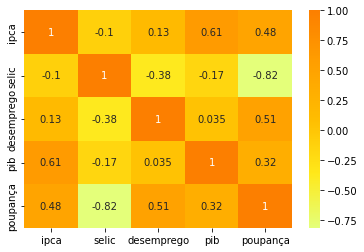

In [16]:
import seaborn as sns

#criar gráfico
sns.heatmap(Tabela_corr.corr(), annot = True, cmap = "Wistia")

#exibe gráfico
plt.show()

Analisando o gráfico, percebe-se que a maior correlação está entre a taxa Selic e a poupança, -0,82. O que significa que eles tiveram grande semelhança em comportamentos opostos. Destaca-se que os índices de desemprego e inflação tiveram valor próximos a 0,5, o que significa que apresentaram uma semelhança razoável ao comportamento da poupança. Para este gráfico, foram analisados dados trimestrais. A sugestão para a continuidade deste estudo é trabalhar os dados de modo que haja mais valores para compor a correlação, a fim de torna-la mais precisa.

## Conclusão
A partir das análises realizadas conclui-se que os índices tiveram seus comportamentos fortemente modificados nos últimos anos principalmente por conta da pandemia. Os depósitos totais obtiveram crescimento relevante durante esse período, mesmo com a alta do desemprego e a queda de sua rentabilidade. As explicações podem ter a ver com uma poupança involuntária criada devido à ausência de gasto com passeios e viagens, com o recebimento do FGTS e outros auxílios, e com a confiança da população em guarda o dinheiro nesta modalidade.